In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import datetime as dt
import pickle
import numpy as np
import borrador
from __future__ import division
from auxiliar_functions import *
import tfe
from itertools import chain, combinations


In [2]:
datos_abril = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_abril_allyearsids_10_100000.csv')


In [3]:
datos_abril = frame_config(datos_abril)

In [3]:
#frame.drop(frame.columns[[2,3,4,5,9,10,11,14,15,16]], axis=1, inplace=True)
datos_abril.head()

,tiempo_subida,id,x_subida,y_subida,tipo_transporte,serviciosentidovariante,tipo_dia,nviaje,netapa,x_bajada,y_bajada,tiempo_bajada,par_subida,par_bajada,zona_subida,zona_bajada,adulto
0,2013-04-21 19:55:16,1132106,346723,6299454,BUS,T203 00I,DOMINGO,13,2,348100,6289103,2013-04-21 20:24:17,E-20-199-NS-2,T-24-205-NS-20,307,348,0
1,2013-04-21 19:35:52,1132106,351378,6302574,BUS,T502 00R,DOMINGO,13,1,346761,6299570,2013-04-21 19:49:12,T-15-135-OP-110,T-4-19-NS-100,188,55,0
2,2013-04-21 07:12:35,1132106,346722,6299393,BUS,T502 00I,DOMINGO,12,2,351366,6302551,2013-04-21 07:26:43,E-20-289-PO-5,T-15-135-PO-5,266,188,0
3,2013-04-21 06:42:07,1132106,348110,6289140,BUS,T203 00R,DOMINGO,12,1,346813,6299398,2013-04-21 07:04:18,T-22-205-SN-65,E-20-190-SN-40,328,307,0
4,2013-04-19 07:25:09,1132106,346717,6299455,BUS,T203 00I,LABORAL,11,2,NaN,NaN,NaN,E-20-199-NS-2,NaN,307,NaN,NaN


minimo:  0.0
maximo:  846.0
diferentes:  779
mediana:  285.0


(array([  1107.,    637.,   2243.,   1284.,   4195.,    585.,   2032.,
          2700.,    776.,   1882.,   6857.,   1547.,   7320.,   3925.,
          1627.,   2898.,  10778.,   2696.,   3010.,    879.,   1231.,
          2877.,   3574.,    528.,    731.,    474.,   2917.,   4450.,
          2436.,   2909.,    239.,    225.,    274.,     18.,      0.,
           640.,   2536.,   1088.,   1760.,    514.,    731.,   1218.,
           748.,   1215.,   1170.,   1119.,   1183.,    676.,   2289.,
           432.]),
 array([   0.  ,   16.92,   33.84,   50.76,   67.68,   84.6 ,  101.52,
         118.44,  135.36,  152.28,  169.2 ,  186.12,  203.04,  219.96,
         236.88,  253.8 ,  270.72,  287.64,  304.56,  321.48,  338.4 ,
         355.32,  372.24,  389.16,  406.08,  423.  ,  439.92,  456.84,
         473.76,  490.68,  507.6 ,  524.52,  541.44,  558.36,  575.28,
         592.2 ,  609.12,  626.04,  642.96,  659.88,  676.8 ,  693.72,
         710.64,  727.56,  744.48,  761.4 ,  778.32,  795.

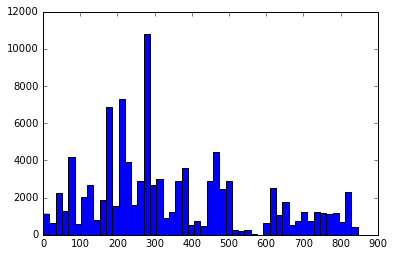

In [31]:
a = np.asarray(datos_abril['zona_subida'])
a = a[np.logical_not(np.isnan(a))]
print "minimo: ", min(a)
print "maximo: ", max(a)
print "diferentes: ", len(set(a))
print "mediana: ", np.median(a)
plt.hist(a,50)

In [20]:
datos_abril.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 23 to 99994
Data columns (total 23 columns):
tiempo_subida              100000 non-null datetime64[ns]
id                         100000 non-null int64
x_subida                   99224 non-null float64
y_subida                   99224 non-null float64
tipo_transporte            100000 non-null object
serviciosentidovariante    98074 non-null object
tipo_dia                   100000 non-null object
nviaje                     100000 non-null int64
netapa                     100000 non-null int64
x_bajada                   86774 non-null float64
y_bajada                   86774 non-null float64
tiempo_bajada              86774 non-null object
par_subida                 99195 non-null object
par_bajada                 86767 non-null object
zona_subida                99180 non-null float64
zona_bajada                86764 non-null float64
adulto                     86774 non-null float64
weekday                    100000 non-

In [12]:
test_sequence_5 = datos_abril.query('id==1261466')
test_sequence_1187 = datos_abril.query('id==50264508')
test_sequence_0 = datos_abril.query('id==1132106')
test_sequence_9 = datos_abril.query('id==1355530')
test_sequence_2168 = datos_abril.query('id==59460077')
test_sequence_3696 = datos_abril.query('id==68660100')
test_sequence_4150= datos_abril.query('id==70321252')

In [13]:
test_sequence = test_sequence_0
[test_sequence_s ,test_sequence_fds] = tfe.split_sequence_by_weekdays(test_sequence)

In [14]:
shortest_activities_s = tfe.get_mean_shortest_activity_length(test_sequence_s)
longest_activities_s = tfe.get_mean_longest_activity_length(test_sequence_s)
shortest_activities_fds = tfe.get_mean_shortest_activity_length(test_sequence_fds)
longest_activities_fds = tfe.get_mean_longest_activity_length(test_sequence_fds)

In [15]:
print str(shortest_activities_s) + " , " + str(shortest_activities_fds)
print str(longest_activities_s) + " , " + str(longest_activities_fds)

495.8 , 66.0
606.6 , 1456.0


In [16]:
latlong1 = (test_sequence_fds['lat_subida'][0],test_sequence_fds['long_subida'][0])
latlong2 = (test_sequence_fds['lat_bajada'][0],test_sequence_fds['long_bajada'][0])

In [17]:
tfe.get_traveled_distance(test_sequence)

195.80861782879802

In [18]:
tfe.get_maximum_travel_distance(test_sequence)

16.883692676581973

In [19]:
tfe.get_minimum_travel_distance(test_sequence)

5.586141389322828

In [20]:
tfe.get_percentage_bus_exclusive_days(test_sequence)

100.0

In [21]:
tfe.get_percentage_rail_exclusive_days(test_sequence)

0.0

In [22]:
tfe.get_card_type(test_sequence)

0

In [23]:
tfe.get_n_days_traveled(test_sequence)

7

In [24]:
tfe.get_n_trips_per_day(test_sequence)

[3, 1, 2, 2, 2, 1, 0, 2]

In [25]:
tfe.get_mean_start_time_first_trip(test_sequence)

33061

In [26]:
tfe.get_mean_start_time_last_trip(test_sequence)

67229

In [27]:
tfe.get_percentage_different_last_origin(test_sequence)

57.14285714285714

In [28]:
tfe.get_percentage_different_first_origin(test_sequence)

42.857142857142854

In [29]:
tfe.get_n_different_locations(test_sequence)

5

In [30]:
tfe.get_radius_of_gyration(test_sequence)

5450.200714686222

In [31]:
tfe.get_radius_of_gyration(test_sequence_fds)

5421.7724863375815

In [32]:
tfe.get_radius_of_gyration(test_sequence_s)

5464.2820177023395

In [33]:
tfe.get_unc_entropy(test_sequence)

2.5545851693377997

In [34]:
tfe.get_random_entropy(test_sequence)

2.3219280948873622

In [35]:
tfe.get_frequence_regularity(test_sequence)

4

In [36]:
tfe.get_entropy(test_sequence)

2.5216406363433181

In [37]:
chronology = tfe.get_chronology(test_sequence,latlong1[0],latlong1[1])
data_days_window = 1
window = data_days_window*24*60 # 8 dias en minutos

In [38]:
tfe.get_regularity(chronology,window)

/home/cata/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


1.6020952049349486

## Testing de parametro de clustering

### Usuario 0

In [39]:
tfe.get_latlong_points(test_sequence_0)

[array([[-33.52627673, -70.63555144],
        [-33.43411554, -70.64810407],
        [-33.40597083, -70.59837899],
        [-33.52915693, -70.63529341],
        [-33.40370241, -70.5959504 ]]),
 ['T-22-205-SN-65',
  'E-20-291-PO-20',
  'T-15-135-OP-110',
  'T-22-205-SN-55',
  'T-15-135-OP-105'],
 [0.38461538461538464,
  0.07692307692307693,
  0.38461538461538464,
  0.07692307692307693,
  0.07692307692307693]]

In [40]:
tfe.get_clusters(test_sequence_0)

array([1, 3, 2, 1, 2], dtype=int32)

In [41]:
tfe.get_ROIs(test_sequence_0,0.6)

[[{'lat': -33.527716828857699, 'long': -70.63542242496419},
  {'lat': -33.404836618443298, 'long': -70.59716469585355}],
 0.92307692307692313]

### Usuario 5

In [42]:
tfe.get_latlong_points(test_sequence_5)

[array([[-33.45538012, -70.59435763],
        [-33.445905  , -70.572037  ],
        [-33.446474  , -70.6605    ],
        [-33.38088497, -70.63959576],
        [-33.45392058, -70.60820951]]),
 ['T-18-157-PO-60',
  'SIMON BOLIVAR',
  'LOS HEROES',
  'T-3-19-NS-45',
  'T-18-157-PO-40'],
 [0.07692307692307693,
  0.3076923076923077,
  0.46153846153846156,
  0.07692307692307693,
  0.07692307692307693]]

In [43]:
tfe.get_clusters(test_sequence_5)

array([1, 2, 3, 4, 1], dtype=int32)

### Usuario 1187

In [44]:
tfe.get_latlong_points(test_sequence_1187)

[array([[-33.445905, -70.572037],
        [-33.445088, -70.654635],
        [-33.418227, -70.60145 ],
        [-33.442848, -70.645809]]),
 ['SIMON BOLIVAR', 'LA MONEDA', 'TOBALABA', 'SANTA LUCIA'],
 [0.4166666666666667,
  0.4166666666666667,
  0.08333333333333333,
  0.08333333333333333]]

In [45]:
tfe.get_clusters(test_sequence_1187)

array([2, 1, 3, 1], dtype=int32)

### Usuario 9

In [46]:
tfe.get_latlong_points(test_sequence_9)

[array([[-33.58569792, -70.56792786],
        [-33.426222  , -70.590972  ],
        [-33.425466  , -70.614272  ],
        [-33.437258  , -70.650551  ],
        [-33.35325793, -70.73862841],
        [-33.3661621 , -70.69038151],
        [-33.58878935, -70.56735882],
        [-33.42337652, -70.60534444]]),
 ['L-34-58-SN-75',
  'CRISTOBAL COLON',
  'PEDRO DE VALDIVIA',
  'PLAZA DE ARMAS',
  'L-6-44-SN-15',
  'T-2-7-PO-6',
  'L-34-58-SN-85',
  'T-14-124-PO-5'],
 [0.25,
  0.25,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333]]

In [47]:
tfe.get_clusters(test_sequence_9)

array([1, 5, 4, 6, 2, 3, 1, 4], dtype=int32)

In [48]:
tfe.get_ROIs(test_sequence_9,0.6)

[[{'lat': -33.587243636232401, 'long': -70.567643341586745},
  {'lat': -33.426222000000003, 'long': -70.590971999999994},
  {'lat': -33.424421262438649, 'long': -70.609808218859499}],
 0.74999999999999989]

### Usuario 2168

In [49]:
tfe.get_latlong_points(test_sequence_2168)

[array([[-33.51969653, -70.69566673],
        [-33.408     , -70.555597  ],
        [-33.52220722, -70.69737383],
        [-33.51585164, -70.69392295]]),
 ['T-29-238-SN-15',
  'HERNANDO DE MAGALLANES',
  'T-29-238-SN-10',
  'T-29-238-NS-15'],
 [0.36363636363636365,
  0.45454545454545453,
  0.09090909090909091,
  0.09090909090909091]]

In [50]:
tfe.get_clusters(test_sequence_2168)

array([1, 2, 1, 1], dtype=int32)

In [51]:
tfe.get_ROIs(test_sequence_2168,0.6)

[[{'lat': -33.519251799763197, 'long': -70.695654501591832},
  {'lat': -33.408000000000001, 'long': -70.555597000000006}],
 1.0]

In [52]:
chronology

[405.73333333333335,
 2704.983333333333,
 4141.35,
 5579.233333333334,
 7016.8,
 10482.116666666667]

In [53]:
window

1440

In [54]:
chronology = tfe.get_chronology(test_sequence_2168,-33.408,-70.555597)
tfe.get_regularity(chronology,window*1)

59.69041525755263

### Usuario 3696

In [55]:
tfe.get_latlong_points(test_sequence_3696)

[array([[-33.491584  , -70.617529  ],
        [-33.5968712 , -70.56581313],
        [-33.52824548, -70.58893172],
        [-33.52617858, -70.58906619],
        [-33.59713105, -70.56879213]]),
 ['CAMINO AGRICOLA',
  'L-34-70-OP-85',
  'L-33-23-OP-50',
  'L-33-9-NS-5',
  'L-34-70-OP-75'],
 [0.5384615384615384,
  0.07692307692307693,
  0.23076923076923078,
  0.07692307692307693,
  0.07692307692307693]]

In [56]:
tfe.get_clusters(test_sequence_3696)

array([3, 1, 2, 2, 1], dtype=int32)

In [57]:
tfe.get_ROIs(test_sequence_3696,0.6)

[[{'lat': -33.491584000000003, 'long': -70.617529000000005},
  {'lat': -33.527212030973004, 'long': -70.588998953262049}],
 0.84615384615384615]

### Usuario 4150

In [58]:
tfe.get_latlong_points(test_sequence_4150)

[array([[-33.60973119, -70.52173709],
        [-33.56950568, -70.5831589 ],
        [-33.60212   , -70.577195  ],
        [-33.60957101, -70.52156182],
        [-33.60800907, -70.52317261]]),
 ['L-34-37-PO-20',
  'L-34-52-PO-5',
  'LAS MERCEDES',
  'L-34-114-NS-5',
  'L-34-2-OP-50'],
 [0.09090909090909091,
  0.45454545454545453,
  0.09090909090909091,
  0.18181818181818182,
  0.18181818181818182]]

In [59]:
tfe.get_clusters(test_sequence_4150)

array([1, 2, 3, 1, 1], dtype=int32)

In [60]:
tfe.get_ROIs(test_sequence_4150,0.6)

[[{'lat': -33.609103755975731, 'long': -70.522157174440835},
  {'lat': -33.569505683331002, 'long': -70.583158899591695}],
 0.90909090909090906]

In [61]:
chronology = tfe.get_chronology(test_sequence_4150,-33.56950568,-70.5831589)
data_days_window = 1
window = data_days_window*24*60 # 8 dias en minutos
tfe.get_regularity(chronology,window)

1.9834816567142834

In [62]:
# regularity not working!

## Testing Big Function

In [63]:
test_sequences = [ test_sequence_5, test_sequence_1187, test_sequence_0, test_sequence_9, \
                  test_sequence_2168, test_sequence_3696, test_sequence_4150]
the_vectors = []
for test_seq in test_sequences:
    the_vectors.append(borrador.get_features(test_seq))

In [64]:
counter = 0
ids = [5,1187,0,9,2168,3696,4150]
for test_seq in test_sequences:
    print "Test de ", ids[counter]
    a = borrador.get_features(test_seq)
    assert tfe.get_mean_shortest_activity_length(test_seq) == a[0]
    assert tfe.get_mean_longest_activity_length(test_seq) == a[1]
    assert tfe.get_traveled_distance(test_seq) == a[2]
    assert tfe.get_maximum_travel_distance(test_seq) == a[3]
    assert tfe.get_minimum_travel_distance(test_seq) == a[4]
    assert tfe.get_radius_of_gyration(test_seq) == a[5]
    assert tfe.get_unc_entropy(test_seq) == a[6]
    assert tfe.get_random_entropy(test_seq) == a[7]
    assert tfe.get_percentage_different_last_origin(test_seq) == a[8]
    assert tfe.get_percentage_different_first_origin(test_seq) == a[9]
    assert tfe.get_card_type(test_seq) == a[10]
    assert tfe.get_mean_start_time_first_trip(test_seq) == a[11]
    assert tfe.get_mean_start_time_last_trip(test_seq) == a[12]
    assert tfe.get_n_days_traveled(test_seq) == a[13]
    assert tfe.get_n_days_traveled_before_stop(test_seq) == a[14]
    assert tfe.get_frequence_regularity(test_seq) == a[15]
    assert tfe.get_percentage_bus_exclusive_days(test_seq) == a[16]
    assert tfe.get_percentage_rail_exclusive_days(test_seq) == a[17]
    assert tfe.get_percentage_bus_trips(test_seq) == a[18]
    counter += 1

Test de  5
Test de  1187
Test de  0
Test de  9
Test de  2168
Test de  3696
Test de  4150


## Measuring euclidean distance between vectors

In [4]:
datos_septiembre = pd.read_csv('/home/cata/Documentos/Datois/etapas_2013_septiembre_allyearsids_10_100000.csv')

In [5]:
datos_septiembre = frame_config(datos_septiembre)

In [67]:
user_ids = [1261466,50264508,1132106,1355530,59460077,68660100,70321252]

In [68]:
the_dfs = []
for i in user_ids:
    a_str = 'datos_septiembre.query("id=='+str(i)+'")'
    the_dfs.append(eval(a_str))


In [69]:
septiembre_vectors = []
for test_seq in the_dfs:
    septiembre_vectors.append(borrador.get_features(test_seq))

In [70]:
counter = 0
counteri = 0
a_matrix = np.zeros((7, 7))
for j in ids:
    abril_vector = the_vectors[counter]
    for i in ids:
        septiembre_vector = septiembre_vectors[counteri]
        dist = np.linalg.norm(np.asarray(abril_vector)-np.asarray(septiembre_vector))
        a_matrix[counter,counteri] = dist
        counteri += 1
    counter += 1
    counteri = 0


In [71]:
comparacion = pd.DataFrame(a_matrix)
comparacion.columns = ids
comparacion.index = ids

In [72]:
comparacion

,5,1187,0,9,2168,3696,4150
5,8698.056229,9215.024712,8318.525410,12368.589067,13987.978403,3509.950257,4983.051979
1187,4405.440182,1010.539792,3699.511785,12575.712935,4266.342331,12574.188670,5596.495341
0,6056.072549,3542.548991,652.246926,12923.616485,7715.843886,9775.230254,4818.975357
9,14013.891632,16864.369474,18601.300337,6830.978001,16109.863545,22420.108623,16448.374152
2168,9467.505020,7853.313513,9043.067843,14570.034593,4188.089540,18945.205599,11985.411812
3696,15521.501214,15017.180726,12827.685621,18882.654686,19895.262944,3765.102466,11689.292148
4150,4163.524120,7700.603244,10458.420914,6314.996568,8620.956147,14475.651008,7061.014621


In [73]:
comparacion[5]

5        8698.056229
1187     4405.440182
0        6056.072549
9       14013.891632
2168     9467.505020
3696    15521.501214
4150     4163.524120
Name: 5, dtype: float64

In [74]:
for i in ids:
    print np.argmin(comparacion[i])

4150
1187
0
4150
2168
5
0


## Measuring distance between vectors (100.000)

In [6]:
N_FEATURES = 19

In [76]:
reload(borrador)
reload(tfe)

<module 'tfe' from 'tfe.pyc'>

In [7]:
datos_abril.set_index(keys=['id'], drop=False,inplace=True)
# get a list of names
ids_abril=datos_abril['id'].unique().tolist()

datos_septiembre.set_index(keys=['id'],drop=False,inplace=True)
# get a list of names
ids_septiembre = datos_septiembre['id'].unique().tolist()

In [211]:
with open('/data/datos_abril_sep_sequence.pickle', 'w') as f:
    pickle.dump(datos_abril, f)
    pickle.dump(datos_septiembre, f)

In [8]:
limit = np.min((len(ids_abril),len(ids_septiembre)))
limit

5169

In [9]:
abril_vectors = np.zeros((limit, N_FEATURES)) 
init_time = time.time()
for i in range(limit):
    an_id = ids_abril[i]
    abril_sequence = datos_abril.loc[datos_abril.id==an_id]
    abril_vector = borrador.get_features(abril_sequence)
    abril_vectors[i] = abril_vector
delta_time = time.time()-init_time
print delta_time

68.2754158974


In [10]:
septiembre_vectors = np.zeros((limit, N_FEATURES)) 
init_time = time.time()
for i in range(limit):
    an_id = ids_abril[i]
    septiembre_sequence = datos_septiembre.loc[datos_septiembre.id==an_id]
    septiembre_vector = borrador.get_features(septiembre_sequence)
    septiembre_vectors[i] = septiembre_vector
delta_time = time.time()-init_time
print delta_time

67.7353751659


In [11]:
with open('/data/features_abril_sep_sequence.pickle', 'w') as f:
    pickle.dump(septiembre_vectors, f)
    pickle.dump(abril_vectors, f)

IOError: [Errno 2] No such file or directory: '/data/features_abril_sep_sequence.pickle'

In [81]:
def matrixToCsv(matrix,name):
    features_names = ["msal","mlal","kmDistance","kmMaxDist","kmMinDist","rg","unc_entropy", \
    "random_entropy","p100_diff_last_origin","p100_diff_first_origin","card_type",\
    "start_time","end_time","traveled_days","traveled_days_bs","frequence_regularity",\
    "p100_exclusive_bus_days","p100_exclusive_metro_days","P100_bus_trips"]
    feature_header = ""
    for feature_name in features_names:
        feature_header = feature_header + "," + feature_name
    feature_header = feature_header[1:]
    np.savetxt(name, matrix, delimiter=",",header=feature_header)

In [82]:
matrixToCsv(abril_vectors,"abril_features.csv")
matrixToCsv(septiembre_vectors,"septiembre_features.csv")

In [83]:
def normalizar(vector):
    a_max = np.max(vector)
    a_min = np.min(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i] - a_min)/a_max
    return vector    

In [84]:
for i in range(abril_vectors.shape[1]):
    abril_vectors[:,i] = normalizar(abril_vectors[:,i])
for i in range(septiembre_vectors.shape[1]):
    septiembre_vectors[:,i] = normalizar(septiembre_vectors[:,i])

In [85]:
a_matrix = np.zeros((limit, limit)) 
init_time = time.time()
for i in range(limit):
    for j in range(limit):
        dist = np.linalg.norm(np.asarray(abril_vectors[i])-np.asarray(septiembre_vectors[j]))
        a_matrix[i,j] = dist
delta_time = time.time()-init_time
print delta_time

237.923491001


In [86]:
identified_indexs = [] #almacena los indices de que secuencia fue seleccionada como match
wrong_indexs = [] # almacena los indices de los que se clasificaron incorrectamente
correct_indexs = [] # almacena los indices de los que se clasificaron correctamente
selected_distance = [] # almacena la distancia de los seleccionados
n_identified = 0
for i in range(limit):
    the_index = np.argmin(a_matrix[:,i])
    selected_distance.append(np.min(a_matrix[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1


In [1]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

NameError: name 'n_identified' is not defined

In [88]:
comparacion = pd.DataFrame(a_matrix)
comparacion.head()

,0,1,2,3,4,5,6,7,8,9,...,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168
0,0.496055,0.535545,1.334875,0.585397,0.592170,1.543217,1.469576,0.832624,1.330784,1.156128,...,1.139396,0.659153,0.487729,0.793494,0.783010,1.118550,0.580956,1.019479,1.877124,0.781857
1,0.746549,0.488402,1.367989,0.671723,0.735779,1.660818,1.494808,0.929673,1.260211,1.312258,...,1.262333,0.845593,0.631783,0.797276,0.960833,1.192409,0.862797,1.056745,1.801578,0.825458
2,1.287972,1.252917,0.652437,1.181101,1.268972,0.642311,0.772319,1.028412,1.272884,0.740082,...,0.776207,1.078998,1.241789,1.348051,1.106040,0.983396,1.036994,1.281260,1.433046,1.296812
3,0.932025,0.735255,1.403975,0.913086,0.806092,1.702132,1.471347,1.020360,1.352030,1.500660,...,1.479097,1.020204,0.829913,0.971733,1.045216,1.427938,1.002527,1.304129,1.811146,1.226238
4,0.908533,0.655550,1.460886,0.818858,0.861406,1.745801,1.593647,1.133195,1.176252,1.461435,...,1.406001,1.063530,0.835020,0.879441,1.201242,1.238474,1.055398,1.314451,1.757807,0.939897


In [89]:
# Explorar Features !!!
# Usar clasificador :D



In [90]:
with open('data/feature_data.pickle', 'w') as f:
    pickle.dump(abril_vectors, f)
    pickle.dump(septiembre_vectors, f)

## Buscar the RoIs 

In [163]:
reload(tfe)

<module 'tfe' from 'tfe.py'>

In [164]:
abril_the_rois = []
init_time = time.time()
for i in range(limit):
    #print i
    an_id = ids_abril[i]
    abril_sequence = datos_abril.loc[datos_abril.id==an_id]
    rois = tfe.get_ROIs(abril_sequence,0.6)
    abril_the_rois.append(rois)
delta_time = time.time()-init_time
print delta_time
    

27.3608319759


In [165]:
septiembre_the_rois = []
init_time = time.time()
for i in range(limit):
    an_id = ids_abril[i]
    septiembre_sequence = datos_septiembre.loc[datos_septiembre.id==an_id]
    rois = tfe.get_ROIs(septiembre_sequence,0.6)
    septiembre_the_rois.append(rois)
delta_time = time.time()-init_time
print delta_time
    

26.6120679379


In [166]:
with open('rois_meters_data.pickle', 'w') as f:
    pickle.dump(abril_the_rois, f)
    pickle.dump(septiembre_the_rois, f)

###  Cual es la probabilidad de encontrar a una persona en sus RoIs? Cuantas RoIs por persona? 

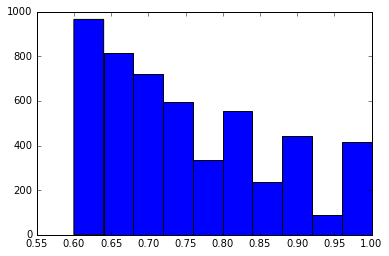

In [167]:
p_of_being_in_rois = [rois[1] for rois in abril_the_rois]
plt.hist(p_of_being_in_rois)
plt.show()

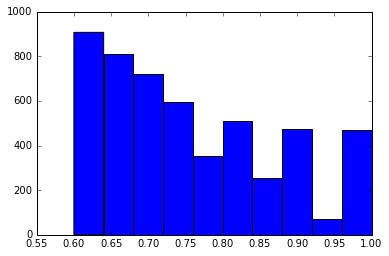

In [168]:
p_of_being_in_rois = [rois[1] for rois in septiembre_the_rois]
plt.hist(p_of_being_in_rois)
plt.show()

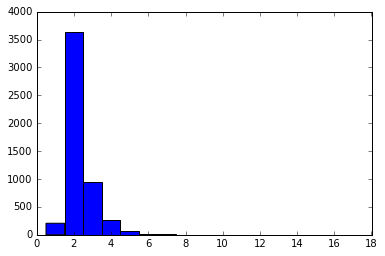

In [169]:
n_of_rois = [len(rois[0]) for rois in abril_the_rois]
d = np.diff(np.unique(n_of_rois)).min()
left_of_first_bin = min(n_of_rois) - float(d)/2
right_of_last_bin = max(n_of_rois) + float(d)/2
plt.hist(n_of_rois, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

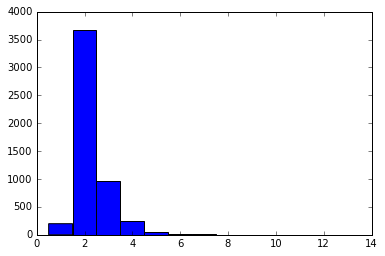

In [170]:
n_of_rois = [len(rois[0]) for rois in septiembre_the_rois]
d = np.diff(np.unique(n_of_rois)).min()
left_of_first_bin = min(n_of_rois) - float(d)/2
right_of_last_bin = max(n_of_rois) + float(d)/2
plt.hist(n_of_rois, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

### Ej. de RoIs

In [171]:
abril_the_rois[0]

[[{'lat': -33.527716828857699, 'long': -70.63542242496419},
  {'lat': -33.404836618443298, 'long': -70.59716469585355}],
 0.92307692307692313]

In [ ]:
datos

In [99]:
abril_the_rois[0]

[[{'lat': -33.527716828857699, 'long': -70.63542242496419},
  {'lat': -33.404836618443298, 'long': -70.59716469585355}],
 0.92307692307692313]

In [173]:
septiembre_the_rois[0]

[[{'lat': -33.405970830060198, 'long': -70.598378987909996},
  {'lat': -33.527716828857699, 'long': -70.63542242496419}],
 0.8125]

In [174]:
vincenty((-33.405970830060198, -70.598378987909996),(-33.411775791558298,-70.604179649681797)).meters

840.0420153061565

In [100]:
septiembre_the_rois[0]

[[{'lat': -33.411775791558298, 'long': -70.604179649681797},
  {'lat': -33.527716828857699, 'long': -70.63542242496419}],
 0.875]

## Comparar si dos secuencias comparten RoIs

####  esto se puede mejorar

In [178]:
from geopy.distance import vincenty

def share_rois(rois_a,rois_b):
    shared = 0
    rois = [rois_a,rois_b]
    index = np.argmin([len(rois_a),len(rois_b)])
    other_index = abs(index-1)
    min_distance = -1
    for i in range(len(rois[index])):
        an_a_roi = rois[index][i]
        lat_a_roi = an_a_roi['lat']
        long_a_roi = an_a_roi['long']
        for j in range(len(rois[other_index])):
            an_b_roi = rois[other_index][j]
            lat_b_roi = an_b_roi['lat']
            long_b_roi = an_b_roi['long']
            a_distance = vincenty((lat_a_roi,long_a_roi),(lat_b_roi,long_b_roi)).meters
            if a_distance < 500:
                shared +=1
            elif min_distance == -1 or min_distance > a_distance:
                min_distance = a_distance
    return [shared,min_distance]

In [201]:
a_matrix = np.ones((limit, limit)) * -1
init_time = time.time()
shared = []
for i in range(limit):
    an_id = ids_abril[i]
    rois_abril = abril_the_rois[i]
    for j in range(limit):
        rois_septiembre = septiembre_the_rois[j]
        share_RoIs,min_distance_not_shared = share_rois(rois_abril[0],rois_septiembre[0])
        shared.append(share_RoIs)
        if share_RoIs > 0:
            abril_sequence = abril_vectors[i]
            septiembre_sequence = septiembre_vectors[j]
            dist = np.linalg.norm(np.asarray(abril_sequence)-np.asarray(septiembre_sequence))
            a_matrix[i,j] = -dist
delta_time = time.time() - init_time
print delta_time

5818.21884584


In [203]:
5818/60

96.96666666666667

### Prueba de tiempo de cuanto demora la iteración limit veces

In [179]:
a_matrix = np.ones((limit, limit)) * -1
init_time = time.time()
shared = []
min_not_shared = []
for i in range(limit):
    an_id = ids_abril[i]
    rois_abril = abril_the_rois[i]
    rois_septiembre = septiembre_the_rois[i]
    share_RoIs,not_shared_roi = share_rois(rois_abril[0],rois_septiembre[0])
    shared.append(share_RoIs)
    min_not_shared.append(not_shared_roi)
delta_time = time.time() - init_time
print delta_time

1.12180304527


In [182]:
len(min_not_shared)

5169

In [200]:
a = pd.DataFrame(np.sort(min_not_shared))
a[800:].head(40)

,0
800,857.444452
801,857.444452
802,857.794273
803,858.427478
804,859.166223
805,859.994929
806,860.210355
807,860.313299
808,860.385536
809,860.453294


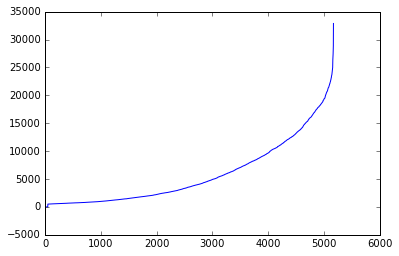

In [187]:
plt.plot(np.sort(min_not_shared))

### Prueba de tiempo de cuanto afecta calcular la distancia

In [156]:
a_matrix = np.ones((limit, limit)) * -1
init_time = time.time()
shared = []
for i in range(limit):
    an_id = ids_abril[i]
    rois_abril = abril_the_rois[i]
    rois_septiembre = septiembre_the_rois[i]
    share_RoIs = share_rois(rois_abril[0],rois_septiembre[0])
    shared.append(share_RoIs)
    abril_sequence = abril_vectors[i]
    septiembre_sequence = septiembre_vectors[i]
    dist = np.linalg.norm(np.asarray(abril_sequence)-np.asarray(septiembre_sequence))
delta_time = time.time() - init_time
print delta_time

0.910485029221


In [151]:
delta_time/60

73.85287203391393

5169


(array([  815.,  2377.,  1956.,    21.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

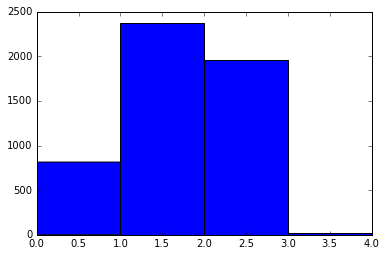

In [162]:
print len(shared)
plt.hist(shared,[0,1,2,3,4])

In [204]:
with open('distance_meters_data.pickle', 'w') as f:
    pickle.dump(a_matrix, f)

In [205]:
identified_indexs = [] #almacena los indices de que secuencia fue seleccionada como match
wrong_indexs = [] # almacena los indices de los que se clasificaron incorrectamente
correct_indexs = [] # almacena los indices de los que se clasificaron correctamente
selected_distance = [] # almacena la distancia de los seleccionados
n_identified = 0
for i in range(limit):
    the_index = np.argmax(a_matrix[:,i])
    selected_distance.append(np.max(a_matrix[:,i]))
    identified_indexs.append(the_index)
    if(the_index!=i):
        wrong_indexs.append(the_index)
    else:
        correct_indexs.append(the_index)
        n_identified += 1


In [206]:
shared_rois_2_month = 0
changed_behaviour = []
for i in range(limit):
    if a_matrix[i,i] != -1:
        shared_rois_2_month += 1
    else:
        changed_behaviour.append(i)

In [207]:
print str(round(shared_rois_2_month*100/limit,2)) + "%"

93.38%


In [208]:
changed_behaviour

[7,
 16,
 35,
 50,
 56,
 67,
 76,
 78,
 92,
 107,
 144,
 146,
 153,
 156,
 157,
 173,
 214,
 215,
 276,
 321,
 324,
 357,
 361,
 372,
 404,
 413,
 420,
 423,
 433,
 450,
 454,
 458,
 481,
 488,
 491,
 507,
 511,
 539,
 540,
 549,
 554,
 555,
 570,
 582,
 590,
 594,
 598,
 632,
 646,
 656,
 679,
 685,
 694,
 695,
 705,
 742,
 745,
 747,
 757,
 774,
 799,
 811,
 812,
 819,
 821,
 824,
 837,
 890,
 919,
 921,
 952,
 953,
 960,
 967,
 978,
 1004,
 1009,
 1019,
 1059,
 1079,
 1089,
 1096,
 1098,
 1142,
 1165,
 1194,
 1199,
 1207,
 1218,
 1237,
 1259,
 1268,
 1273,
 1274,
 1282,
 1285,
 1286,
 1287,
 1305,
 1316,
 1327,
 1329,
 1335,
 1338,
 1348,
 1358,
 1380,
 1392,
 1400,
 1407,
 1425,
 1443,
 1456,
 1464,
 1472,
 1473,
 1502,
 1509,
 1521,
 1526,
 1532,
 1535,
 1549,
 1555,
 1563,
 1566,
 1581,
 1601,
 1606,
 1607,
 1610,
 1611,
 1627,
 1655,
 1666,
 1680,
 1684,
 1690,
 1691,
 1702,
 1703,
 1706,
 1711,
 1731,
 1768,
 1776,
 1814,
 1821,
 1832,
 1872,
 1885,
 1887,
 1890,
 1895,
 1911,


In [120]:
len(changed_behaviour)

815

In [114]:
ids_abril[7]

1320506

In [115]:
datos_abril.loc[datos_abril.id==ids_abril[7]][['par_subida']]

,par_subida
id,
1320506,UNIVERSIDAD DE SANTIAGO
1320506,I-26-228-SN-25
1320506,L-30-64-PO-25
1320506,LA CISTERNA
1320506,T-20-188-NS-10
1320506,T-20-188-NS-5
1320506,T-20-188-NS-10
1320506,UNIVERSIDAD DE CHILE
1320506,T-20-188-NS-10


In [116]:
datos_septiembre.loc[datos_septiembre.id==ids_abril[7]][['par_subida']]

,par_subida
id,
1320506,E-20-291-PO-5
1320506,E-14-110-SN-75
1320506,T-4-19-SN-4
1320506,L-1-11-NS-5
1320506,E-20-291-PO-5
1320506,T-14-135-OP-10
1320506,E-20-291-PO-15
1320506,L-1-13-PO-25
1320506,E-20-291-PO-5


In [209]:
porcentaje_correcto = n_identified*100/limit
print str(round(porcentaje_correcto,2))+ "%"

21.09%


In [210]:
shared[0]

2

(array([   42.,    40.,    99.,   240.,   509.,  1064.,  1359.,  1169.,
          499.,   148.]),
 array([-1.        , -0.91285182, -0.82570364, -0.73855546, -0.65140729,
        -0.56425911, -0.47711093, -0.38996275, -0.30281457, -0.21566639,
        -0.12851821]),
 <a list of 10 Patch objects>)

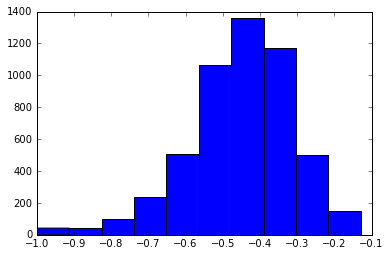

In [118]:
plt.hist(selected_distance)

In [119]:
plt.hist(correct)

NameError: name 'correct' is not defined

In [123]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

In [125]:
latlong_points = tfe.get_latlong_points(test_sequence_0)
latlong_points[0]

array([[-33.52627673, -70.63555144],
       [-33.43411554, -70.64810407],
       [-33.40597083, -70.59837899],
       [-33.52915693, -70.63529341],
       [-33.40370241, -70.5959504 ]])

In [137]:
Z_euclidean = linkage(latlong_points[0],'ward')
clusters_euclidean = fcluster(Z_euclidean,0.02,criterion='distance')

In [138]:
meters_distance = pdist(latlong_points[0],lambda x,y: vincenty(x,y).meters)

In [145]:
Z_meters = linkage(latlong_points[0],'weighted',lambda x,y: vincenty(x,y).meters)
clusters_meters = fcluster(Z_meters,500,criterion='distance')

In [146]:
clusters_euclidean

array([1, 3, 2, 1, 2], dtype=int32)

In [147]:
clusters_meters

array([1, 5, 3, 2, 4], dtype=int32)

In [149]:
m = pd.DataFrame(Z_euclidean)
m

,0,1,2,3
0,0,3,0.002892,2
1,2,4,0.003323,2
2,1,6,0.067844,3
3,5,7,0.178319,5


In [150]:
n = pd.DataFrame(Z_meters)
n

,0,1,2,3
0,0,3,320.352521,2
1,2,4,338.139432,2
2,1,6,5744.021444,3
3,5,7,12266.980859,5


In [14]:
selected_features = ["msal","mlal","kmDistance","kmMaxDist","kmMinDist","rg","unc_entropy", \
    "random_entropy","p100_diff_last_origin","p100_diff_first_origin", \
    "start_time","end_time","traveled_days","frequence_regularity","P100_bus_trips"]

In [15]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [16]:
len(set(powerset(selected_features)))

32768

In [18]:
32768*20/60

10922.666666666666

In [27]:
a = np.asmatrix([np.asarray([1,2,3]),np.asarray([2,4,5])])
b = np.asmatrix([np.asarray([3,4,8]),np.asarray([1,1,1])])

In [28]:
pd.DataFrame(a)

,0,1,2
0,1,2,3
1,2,4,5


In [29]:
pd.DataFrame(b)

,0,1,2
0,3,4,8
1,1,1,1


In [32]:
pd.DataFrame(a-b)

,0,1,2
0,-2,-2,-5
1,1,3,4


In [33]:
pd.DataFrame(abs(a-b))

,0,1,2
0,2,2,5
1,1,3,4
